# Loan Classification Problem
Loan approval prediction. Generally, it involves the lender looking at various background information about the applicant, and deciding whether the bank should grant the loan. Parameters like credit score, loan amount, lifestyle, career, and assets are the deciding factors in getting the loan approved. If, in the past, people with parameters similar to yours have paid their dues timely, it is more likely that your loan would be granted as well.

<br>

## Table of Content
- [ 1 - Packages ](#1)
- [ 2 - Understanding the data ](#2)
  - [ 2.1 Loading and visualizing the data ](#2.1)
- [ 3 - Data preprocessing ](#3)
  - [ 3.1 Data Cleaning ](#3.1)
  - [ 3.2 Feature transformation ](#3.2)
  - [ 3.3 Conclusion ](#3.3)
- [ 4 - Models Implementation ](#4)
  - [ 4.1 Gradient Boosting Classifier ](#4.1)
  - [ 4.2 Random Forest Classifier ](#4.2)
  - [ 4.3 Decision Tree Classifier ](#4.3)
  - [ 4.4 K-Neighbors Classifier ](#4.4)
  - [ 4.5 Linear Support Vector Classifier ](#4.5)
  - [ 4.6 XGB Classifier ](#4.6)
  - [ 4.7 Logistic Regression Classifier ](#4.7)
- [ 5 - Evaluating the Models ](#5)
  - [ 5.1 Gradient Boosting Classifier ](#5.1)
  - [ 5.2 Random Forest Classifier ](#5.2)
  - [ 5.3 Decision Tree Classifier ](#5.3)
  - [ 5.4 K-Neighbors Classifier ](#5.4)
  - [ 5.5 Linear Support Vector Classifier ](#5.5)
  - [ 5.6 XGB Classifier ](#5.6)
  - [ 5.7 Logistic Regression Classifier ](#5.7)
- [ 6 - Conclusion ](#6)


***work only with train data***

<a id="1"></a>
## 1 - Packages

First, Let's import all the packages that we will need during this project

- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org) is a famous package for data analysis and manipulation tool in Python.
- [matplotlib](https://matplotlib.org) is a famous library to plot graphs in Python.
- [seaborn](https://seaborn.pydata.org) is a famous Python data visualization library based on matplotlib.
- [sklearn](https://scikit-learn.org) is a wide-used, simple and efficient tool for predictive data analysis in Python.
- [xgboost](https://xgboost.readthedocs.io) is an optimized distributed gradient boosting library that implements machine learning algorithms in Python.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

<a id="2"></a>
## 2 - Understanding the data

The data is collected from *<a href="https://www.kaggle.com/datasets/burak3ergun/loan-data-set">Kaggle</a>* which address the attributes of many applicants and the state of the loan.
<br>
<a id="2.1"></a>
### 2.1 Loading and visualizing the data

In [3]:
#Read data
df = pd.read_csv("/kaggle/input/loan-data/train.csv")

#### View the features
Let's get more familiar with the dataset.

In [4]:
#preview data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id="2.2"></a>
### 2.2 Understanding the dataset features
##### Displaying information about the features

In [5]:
#Preview data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### The meaning of the features

| Variable Name     | Description                                                                        |
|-------------------|------------------------------------------------------------------------------------|
| Loan_ID           | Loan reference number(unique ID)                                                   |
| Gender            | Applicant gender(Male or Female)                                                   |
| Married           | Applicant marital status(Married or not married)                                   |
| Dependents        | Number of family members                                                           |
| Education         | 	Applicant education/qualification(graduate or not graduate)                       |
| Self_Employed     | 	Applicant employment status(yes for self-employed, no for employed/others)        |
| ApplicantIncome   | Applicant's monthly salary/income                                                  |
| CoapplicantIncome | Additional applicant's monthly salary/income                                       |
| LoanAmount        | Loan amount                                                                        |
| Loan_Amount_Term  | 	The loan's repayment period (in days)                                             |
| Credit_History    | 	Records of previous credit history(0: bad credit history, 1: good credit history) |
| Property_Area     | The location of property(Rural/Semiurban/Urban)                                    |
| Loan_Status       | Status of loan(Y: accepted, N: not accepted)                                       |



<a id="3"></a>
## 3 - Data preprocessing
Data preprocessing is used to transform the raw data in a useful and efficient format by cleaning the data, transform it and reduction it and  so on.
<br>

<a id="3.1"></a>
### 3.1 Data Cleaning
First, let's check whether the data have missing values or not.

In [6]:
#Preview data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Check missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Therefor, the features `Gender`, `Married`, `Dependents`, `Self-Employed`, `LoanAmount`, `Loan_Amount_Term` and `Credit_History` have missing values.

- Let's fix them one by one.

#### Gender - Missing Value

In [8]:
# percent of missing "Gender"
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))
# %s specifically is used to perform concatenation of strings together.
print("Number of people who take a loan group by gender :")
print(df['Gender'].value_counts())

Percent of missing "Gender" records is 2.12%
Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


##### Visualizing Gender

<AxesSubplot:>

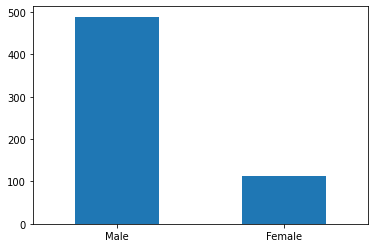

In [9]:
df['Gender'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Gender', ylabel='count'>

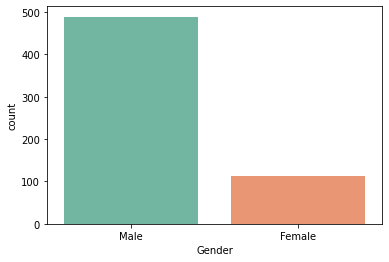

In [10]:
#visuals

sns.countplot(x='Gender', data=df, palette = 'Set2')

#### Married - Missing Value

In [11]:
# percent of missing "Married"
print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by marital status :")
print(df['Married'].value_counts())

Percent of missing "Married" records is 0.49%
Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


##### Visualizing Married

<AxesSubplot:>

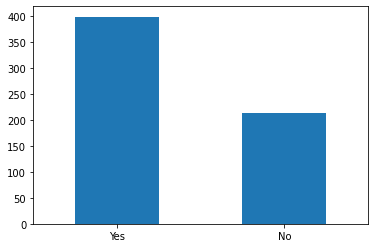

In [12]:
#visuals
df['Married'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Married', ylabel='count'>

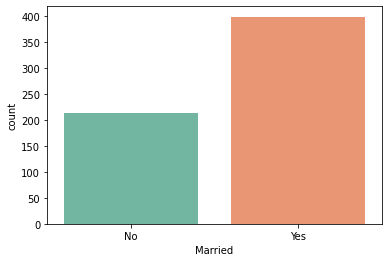

In [13]:
sns.countplot(x='Married', data=df, palette = 'Set2')

#### Dependents - Missing Value

In [14]:
# percent of missing "Dependents"
print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by dependents :")
print(df['Dependents'].value_counts())

Percent of missing "Dependents" records is 2.44%
Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


##### Visualizing Dependents

<AxesSubplot:>

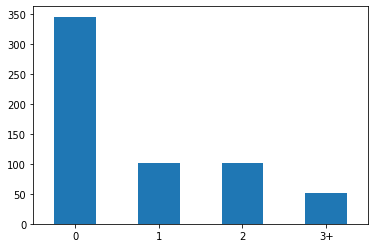

In [15]:
#visuals
df['Dependents'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

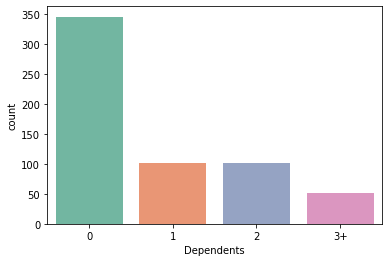

In [16]:
sns.countplot(x='Dependents', data=df, palette = 'Set2')

#### Self Employed - Missing Value

In [17]:
# percent of missing "Self_Employed"
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by self employed :")
print(df['Self_Employed'].value_counts())

Percent of missing "Self_Employed" records is 5.21%
Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


##### Visualizing Self Employed

<AxesSubplot:>

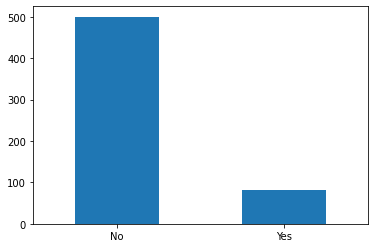

In [18]:
#visuals
df['Self_Employed'].value_counts().plot.bar(rot=0)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

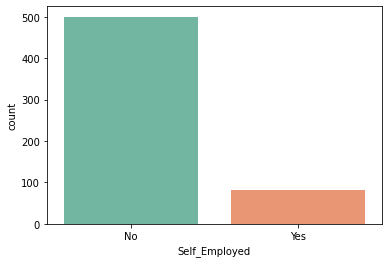

In [19]:
sns.countplot(x='Self_Employed', data=df, palette = 'Set2')

#### Loan Amount - Missing Value

In [20]:
# percent of missing "LoanAmount"
print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


##### Visualizing Loan Amount

In [21]:
df["LoanAmount"]

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

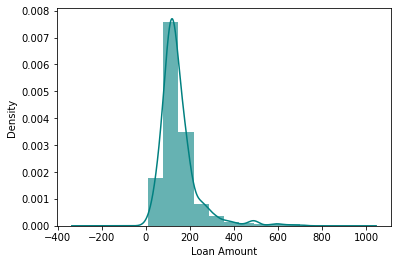

In [22]:
#visuals
ax = df["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
df["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

##### Loan Amount is skewed and have outliers

<AxesSubplot:ylabel='LoanAmount'>

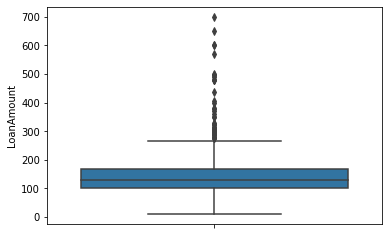

In [23]:
sns.boxplot(y='LoanAmount', data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

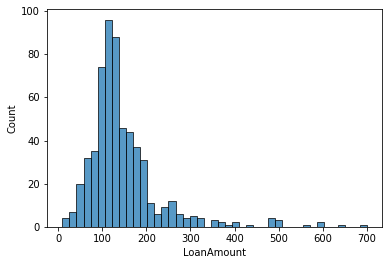

In [24]:
sns.histplot(data=df, x='LoanAmount', palette='Set2')

In [25]:
print(df['LoanAmount'].median())
print(df['LoanAmount'].mode())
print(df['LoanAmount'].mean())

128.0
0    120.0
dtype: float64
146.41216216216216


#### Loan Amount Term - Missing Value

In [26]:
# percent of missing "Loan_Amount_Term"
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by loan amount term :")
print(df['Loan_Amount_Term'].value_counts())

Percent of missing "Loan_Amount_Term" records is 2.28%
Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


##### Visualizing Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

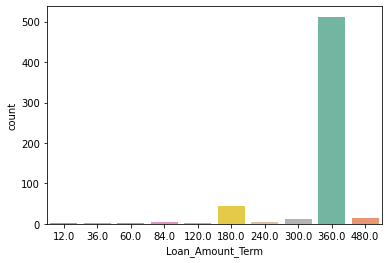

In [27]:
#visuals
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'Set2')

#### Credit History - Missing Value

In [28]:
# percent of missing "Credit_History"
print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))
print("Number of people who take a loan group by credit history :")
print(df['Credit_History'].value_counts())

Percent of missing "Credit_History" records is 8.14%
Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


##### Visualizing Credit History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

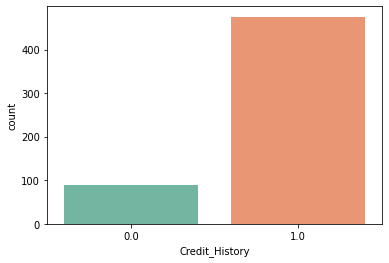

In [29]:
sns.countplot(x='Credit_History', data=df, palette = 'Set2')

#### Conclusion
*Based on the previous visualization, we will fill the missing data of the features by*:
- If `Gender` is missing = Male (mode).
- If `Married` is missing = yes (mode).
- If `Dependents` is missing = 0 (mode).
- If `Self_Employed` is missing = no (mode).
- If `LoanAmount` is missing = median of data. (it's a numeric data, mode doesn't make sense)
- If `Loan_Amount_Term` is missing = 360 (mode).
- If `Credit_History` is missing = 1.0 (mode).

In [30]:
train_data = df.copy()
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [31]:
#Check missing values
train_data.isnull().sum()
# train_data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<strong>The data looks fine, no more missing values ... moving into the next point.</strong>

<a id="3.2"></a>
### 3.2 Data transformation
Here, we transform the data into appropriate forms suitable for mining process by doing Normalization.
<br>
#### Transform and Convert categorical object data type to Numeric(int64)
generate the new data type to transform into

In [32]:
gender_stat = {"Female": 1, "Male": 2}
yes_no_stat = {'No': 1, 'Yes': 2}
dependents_stat = {'0': 0, '1': 1, '2': 2, '3+': 3}
education_stat = {'Not Graduate': 1, 'Graduate': 2}
property_stat = {'Semiurban': 0, 'Urban': 1, 'Rural': 2}

now replace the categorical objects with the generated data type.

In [33]:
train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

Let's preview the data once more.

In [34]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,2,1,5849,0.0,128.0,360.0,1.0,1,Y
1,LP001003,2,2,1,2,1,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,2,2,0,2,2,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,2,1,0,2,1,6000,0.0,141.0,360.0,1.0,1,Y


#### Feature Scaling
there are many problems in the data in terms of the scales of the data like the next following example

'loan amount term is numerical data not following the normal distribution '

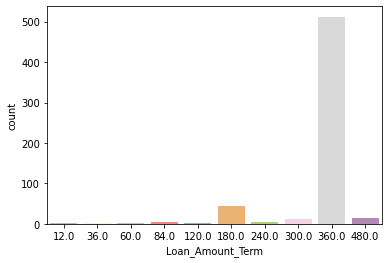

In [35]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='Set3')
"""loan amount term is numerical data not following the normal distribution """

##### Min-Max Normalization
for Numeric data

In [36]:
#minimax scaler
#for numeric
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_data.iloc[:, 6:10])
normData = pd.DataFrame(min_max_scaler.transform(train_data.iloc[:, 6:10]), index=train_data.index, columns=train_data.iloc[:, 6:10].columns)
train_data.iloc[:, 6:10] = normData

let's preview the data

In [37]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,2,1,0.070489,0.000000,0.172214,0.74359,1.0,1,Y
1,LP001003,2,2,1,2,1,0.054830,0.036192,0.172214,0.74359,1.0,2,N
2,LP001005,2,2,0,2,2,0.035250,0.000000,0.082489,0.74359,1.0,1,Y
3,LP001006,2,2,0,1,1,0.030093,0.056592,0.160637,0.74359,1.0,1,Y
4,LP001008,2,1,0,2,1,0.072356,0.000000,0.191027,0.74359,1.0,1,Y


for property area and dependents features

In [38]:
#for property area and dependents
prop_depend_scaler = MinMaxScaler()
prop_depend_scaler.fit(train_data.loc[:, ['Dependents', 'Property_Area']])
prop_depend_norm = pd.DataFrame(prop_depend_scaler.transform(train_data.loc[:, ['Dependents', 'Property_Area']]), index=train_data.loc[:, ['Dependents', 'Property_Area']].index, columns=train_data.loc[:, ['Dependents', 'Property_Area']].columns)
train_data.loc[:, ['Dependents', 'Property_Area']] = prop_depend_norm

let's preview the data again

In [39]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0.000000,2,1,0.070489,0.000000,0.172214,0.74359,1.0,0.5,Y
1,LP001003,2,2,0.333333,2,1,0.054830,0.036192,0.172214,0.74359,1.0,1.0,N
2,LP001005,2,2,0.000000,2,2,0.035250,0.000000,0.082489,0.74359,1.0,0.5,Y
3,LP001006,2,2,0.000000,1,1,0.030093,0.056592,0.160637,0.74359,1.0,0.5,Y
4,LP001008,2,1,0.000000,2,1,0.072356,0.000000,0.191027,0.74359,1.0,0.5,Y


<a id="3.3"></a>
### 3.3 Conclusion
let's see the data stats before preprocessing

In [40]:
#Preview data information
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now, after data preprocessing

In [41]:
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
train_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.817590,1.653094,0.248100,1.781759,1.133550,0.064978,0.038910,0.197905,0.706005,0.855049,0.456026
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.075560,0.070229,0.121718,0.137668,0.352339,0.407540
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,2.000000,1.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000
50%,2.000000,2.000000,0.000000,2.000000,1.000000,0.045300,0.028524,0.172214,0.743590,1.000000,0.500000
75%,2.000000,2.000000,0.333333,2.000000,1.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000
max,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="4"></a>
## 4 - Models Predictions
First, we split the data into training set and test set then make parameter tuning and finally evaluate models

In [43]:
#split data
x = train_data.iloc[:,1:12]
y = train_data.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1234)
expected_y = y_test

<a id="4.1"></a>
### 4.1 Gradient Boosting Classifier

In [66]:
#GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=4) #was 100
GBC.fit(X_train, y_train)
GBC_predicted_y = GBC.predict(X_test)

In [63]:
depth = range(1,50)
testing_acc = []
training_acc =[]
score = 0
for i in depth:
    GBC = GradientBoostingClassifier(n_estimators = i)
    GBC.fit(X_train, y_train)
    ypred_train = GBC.predict(X_train)
    training_acc.append(accuracy_score(y_train,ypred_train))
    ypred_test = GBC.predict(X_test)
    acc_score = accuracy_score(expected_y,ypred_test)
    testing_acc.append(acc_score)
    if(score < acc_score):
        score = acc_score
        best_depth = i

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


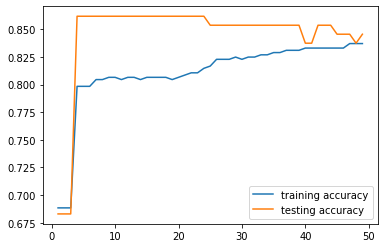

In [64]:
training_acc_np = np.array(training_acc , dtype = 'float64')
testing_acc_np = np.array(testing_acc)
ax = sns.lineplot(depth,training_acc_np)
sns.lineplot(depth,testing_acc_np)
plt.legend(['training accuracy','testing accuracy'])
plt.show()

In [65]:
print('the best estimators for Gradient boosting classifier = ',best_depth)

the best estimators for Gradient boosting classifier =  4


<a id="4.2"></a>
### 4.2 Random Forest Classifier

In [213]:
#RandomForestClassifier
RFC = RandomForestClassifier(criterion= 'gini', max_depth = 6, max_features ='auto', n_estimators = 10 )
RFC.fit(X_train, y_train)
RFC_predicted_y = RFC.predict(X_test)

In [210]:
param_grid = { 
    'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'criterion' :['gini', 'entropy']
}

In [211]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(RFC, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(x, y_grid)

Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


In [212]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
         print("%f (%f) with: %r" % (mean, stdev, param))
         if((-mean) < min_mean):
                min_mean = mean
                min_param = param

Best: -0.478006 using {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 10}
-0.580508 (0.066144) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 1}
-0.576587 (0.058276) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 2}
-0.571376 (0.050504) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 3}
-0.573594 (0.046367) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 4}
-0.543496 (0.029826) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 5}
-0.548709 (0.035230) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 6}
-0.542405 (0.042769) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 7}
-0.566236 (0.027887) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 8}
-0.551277 (0.021588) with: {'cri

Text(0, 0.5, 'Log Loss')

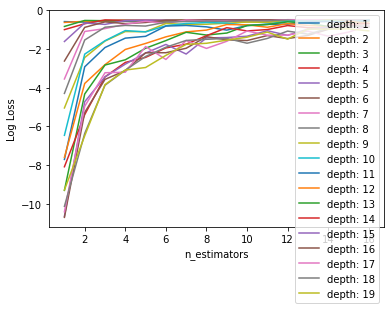

In [204]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

<a id="4.3"></a>
### 4.3 Decision Tree Classifier

In [77]:
#DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=1,criterion='entropy')
DTC.fit(X_train, y_train)
DTC_predicted_y = DTC.predict(X_test)

In [76]:
depth = range(1,25)
testing_acc = []
training_acc =[]
score = 0
for i in depth:
    DTC = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    DTC.fit(X_train, y_train)
    ypred_train = DTC.predict(X_train)
    training_acc.append(accuracy_score(y_train,ypred_train))
    ypred_test = DTC.predict(X_test)
    acc_score = accuracy_score(expected_y,ypred_test)
    testing_acc.append(acc_score)
    if(score < acc_score):
        score = acc_score
        best_depth = i

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


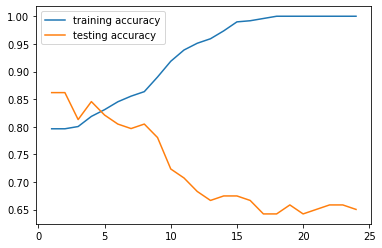

In [78]:
training_acc_np = np.array(training_acc , dtype = 'float64')
testing_acc_np = np.array(testing_acc)
ax = sns.lineplot(depth,training_acc_np)
sns.lineplot(depth,testing_acc_np)
plt.legend(['training accuracy','testing accuracy'])
plt.show()

In [79]:
print('the best depth for Decision tree classifier = ',best_depth)

the best depth for Decision tree classifier =  1


<a id="4.4"></a>
### 4.4 K-Neighbors Classifier

In [84]:
#KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
KNN_predicted_y = KNN.predict(X_test)

In [80]:
depth = range(1,15)
testing_acc = []
training_acc =[]
score = 0
for i in depth:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    ypred_train = KNN.predict(X_train)
    training_acc.append(accuracy_score(y_train,ypred_train))
    ypred_test = KNN.predict(X_test)
    acc_score = accuracy_score(expected_y,ypred_test)
    testing_acc.append(acc_score)
    if(score < acc_score):
        score = acc_score
        best_depth = i

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


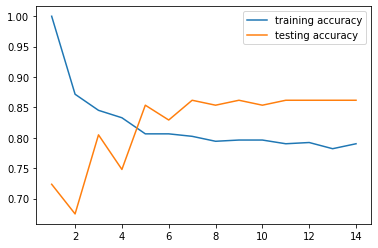

In [82]:
training_acc_np = np.array(training_acc , dtype = 'float64')
testing_acc_np = np.array(testing_acc)
ax = sns.lineplot(depth,training_acc_np)
sns.lineplot(depth,testing_acc_np)
plt.legend(['training accuracy','testing accuracy'])
plt.show()

In [83]:
print('the best number of neighbors  for KNN classifier = ',best_depth)

the best number of neighbors  for KNN classifier =  7


<a id="4.5"></a>
### 4.5 Linear Support Vector Classifier

In [95]:
#LinearSVC
SVM = svm.LinearSVC(max_iter=800) #was 5000
SVM.fit(X_train, y_train)
SVM_predicted_y = SVM.predict(X_test)

In [92]:
depth = range(800,10000,100)
testing_acc = []
training_acc =[]
score = 0
for i in depth:
    SVM = svm.LinearSVC(max_iter=i)
    SVM.fit(X_train, y_train)
    ypred_train = SVM.predict(X_train)
    training_acc.append(accuracy_score(y_train,ypred_train))
    ypred_test = SVM.predict(X_test)
    acc_score = accuracy_score(expected_y,ypred_test)
    testing_acc.append(acc_score)
    if(score < acc_score):
        score = acc_score
        best_depth = i

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


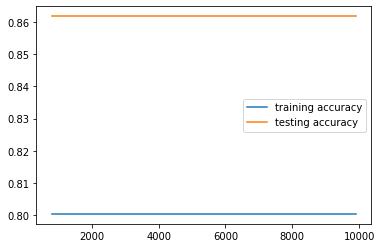

In [93]:
training_acc_np = np.array(training_acc , dtype = 'float64')
testing_acc_np = np.array(testing_acc)
ax = sns.lineplot(depth,training_acc_np)
sns.lineplot(depth,testing_acc_np)
plt.legend(['training accuracy','testing accuracy'])
plt.show()

In [94]:
print('the best number of iterations for SVM classifier = ',best_depth)

the best number of iterations for SVM classifier =  800


<a id="4.6"></a>
### 4.6 XGB Classifier

In [164]:
yes_no_for_XGB = {'Y':1,'N':0}
y_train_xgb =  y_train.replace(yes_no_for_XGB)
y_test_xgb = y_test.replace(yes_no_for_XGB)

In [165]:
#XGBClassifier
XGBC = xgb.XGBClassifier(max_depth = 2,n_estimators =9)
XGBC.fit(X_train, y_train_xgb)
XGBC_predicted_y = XGBC.predict(X_test)

In [120]:
y_grid = y.replace(yes_no_for_XGB)

In [121]:
#run gridsearch
n_estimators = [1,2,3,4,5,6,7,8,9,10,15]
max_depth = range(1,10)
min_mean =0
min_param =0 
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGBC, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(x, y_grid)

range(1, 10)
Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [122]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
         print("%f (%f) with: %r" % (mean, stdev, param))
         if((-mean) < min_mean):
                min_mean = mean
                min_param = param

Best: -0.479007 using {'max_depth': 2, 'n_estimators': 9}
-0.594814 (0.008975) with: {'max_depth': 1, 'n_estimators': 1}
-0.543433 (0.015566) with: {'max_depth': 1, 'n_estimators': 2}
-0.515131 (0.020636) with: {'max_depth': 1, 'n_estimators': 3}
-0.499282 (0.024586) with: {'max_depth': 1, 'n_estimators': 4}
-0.490393 (0.027663) with: {'max_depth': 1, 'n_estimators': 5}
-0.486171 (0.029619) with: {'max_depth': 1, 'n_estimators': 6}
-0.480700 (0.031030) with: {'max_depth': 1, 'n_estimators': 7}
-0.480872 (0.032178) with: {'max_depth': 1, 'n_estimators': 8}
-0.480332 (0.031695) with: {'max_depth': 1, 'n_estimators': 9}
-0.479819 (0.033905) with: {'max_depth': 1, 'n_estimators': 10}
-0.480246 (0.038175) with: {'max_depth': 1, 'n_estimators': 15}
-0.595278 (0.008813) with: {'max_depth': 2, 'n_estimators': 1}
-0.542953 (0.016030) with: {'max_depth': 2, 'n_estimators': 2}
-0.515489 (0.022412) with: {'max_depth': 2, 'n_estimators': 3}
-0.499177 (0.026806) with: {'max_depth': 2, 'n_estimators'

Text(0, 0.5, 'Log Loss')

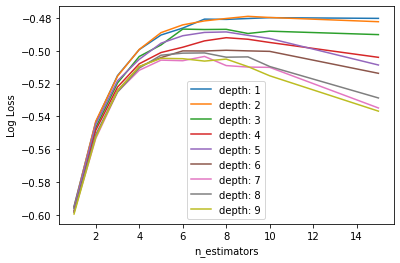

In [104]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')

<a id="4.7"></a>
### 4.7 Logistic Regression Classifier

In [123]:
#LogisticRegression
LRC = LogisticRegression()
LRC.fit(X_train, y_train)
LRC_predicted_y = LRC.predict(X_test)

<a id="5"></a>
## 5 - Evaluation the Models

Let's prepare to store all the scores for the Conclusion later

In [215]:
scores_of_models = []
classifier = ('Gradient Boosting' , 'Random Forest' ,'Decision Tree' , 'K-Nearest Neighbor' , 'SVM' ,'XGBoost','LogisticRegression')
y_pos = np.arange(len(classifier))

<a id="5.1"></a>
### 5.1 Gradient Boosting Classifier

##### Accuracy

In [216]:
GBC_accuracy_score = accuracy_score(expected_y, GBC_predicted_y)*100
scores_of_models.append(GBC_accuracy_score)
print('The accuracy of GBC classification is %.2f%%' % GBC_accuracy_score) #was 79.67%

The accuracy of GBC classification is 86.18%


##### F1-Score

$$F1_{score} = \frac{2 × precision × recall}{precision + recall}$$
<br>

- **precision** is the rate of the right predicted labels out of all the **_predicted_** positive labels, donated from this equation
    $$precision = \frac{TP}{TP + FP}$$
<br>

- **recall** is the rate of the right predicted labels out of all the **_actual_** positive labels, donated from this equation
    $$recall = \frac{TP}{TP + FN}$$

In [217]:
print('The F1 Score of GBC classification is %.3f' %(f1_score(expected_y, GBC_predicted_y, average='macro')))

The F1 Score of GBC classification is 0.815


##### Confusion Matrix

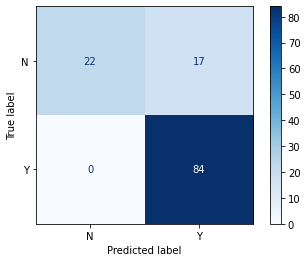

In [148]:
cm = confusion_matrix(expected_y, GBC_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="5.2"></a>
### 5.2 Random Forest Classifier

##### Accuracy

In [218]:
RFC_accuracy_score = accuracy_score(expected_y, RFC_predicted_y)*100
scores_of_models.append(RFC_accuracy_score)
print('The accuracy of RFC classification is %.2f%%' % RFC_accuracy_score) #tune only estimators accuracy was 77.24% ,81.30%

The accuracy of RFC classification is 83.74%


##### F1-Score

In [150]:
print('The F1 Score of RFC classification is %.3f' %(f1_score(expected_y, RFC_predicted_y, average='macro')))

The F1 Score of RFC classification is 0.764


##### Confusion Matrix

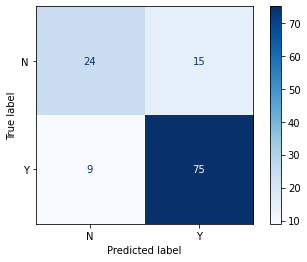

In [151]:
cm = confusion_matrix(expected_y, RFC_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="5.3"></a>
### 5.3 Decision Tree Classifier

##### Accuracy

In [219]:
DTC_accuracy_score = accuracy_score(expected_y, DTC_predicted_y)*100
scores_of_models.append(DTC_accuracy_score)
print('The accuracy of DTC classification is %.2f%%' % DTC_accuracy_score)

The accuracy of DTC classification is 86.18%


##### F1-Score

In [153]:
print('The F1 Score of DTC classification is %.3f' %(f1_score(expected_y, DTC_predicted_y, average='macro')))

The F1 Score of DTC classification is 0.815


##### Confusion Matrix

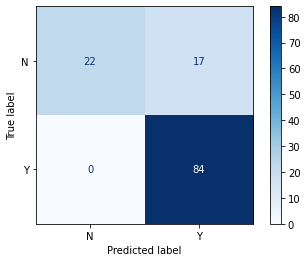

In [154]:
cm = confusion_matrix(expected_y, DTC_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="5.4"></a>
### 5.4 K-Neighbor Classifier

##### Accuracy

In [220]:
KNN_accuracy_score = accuracy_score(expected_y, KNN_predicted_y)*100
scores_of_models.append(KNN_accuracy_score)
print('The accuracy of KNN classification is %.2f%%' % KNN_accuracy_score) #was 85.37%

The accuracy of KNN classification is 86.18%


##### F1-Score

In [156]:
print('The F1 Score of KNN classification is %.3f' %(f1_score(expected_y, KNN_predicted_y, average='macro')))

The F1 Score of KNN classification is 0.815


##### Confusion Matrix

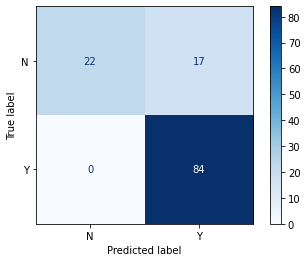

In [157]:
cm = confusion_matrix(expected_y, KNN_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="5.5"></a>
### 5.5 Linear Support Vector Classifier

##### Accuracy

In [221]:
SVM_accuracy_score = accuracy_score(expected_y, SVM_predicted_y)*100
scores_of_models.append(SVM_accuracy_score)
print('The accuracy of SVM classification is %.2f%%' % SVM_accuracy_score)#was 86.18%

The accuracy of SVM classification is 86.18%


##### F1-Score

In [159]:
print('The F1 Score of SVM classification is %.3f' %(f1_score(expected_y, SVM_predicted_y, average='macro')))

The F1 Score of SVM classification is 0.815


##### Confusion Matrix

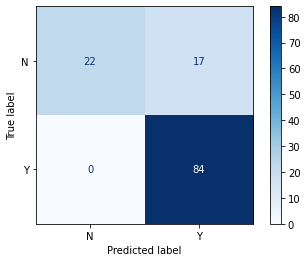

In [160]:
cm = confusion_matrix(expected_y, SVM_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="5.6"></a>
### 5.6 XGB Classifier

##### Accuracy

In [222]:
XGB_accuracy_score = accuracy_score(y_test_xgb, XGBC_predicted_y)*100
scores_of_models.append(XGB_accuracy_score)
print('The accuracy of XGBC classification is %.2f%%' % XGB_accuracy_score)# was  78.05%

The accuracy of XGBC classification is 86.18%


##### F1-Score

In [169]:
print('The F1 Score of XGBC classification is %.3f' %(f1_score(y_test_xgb, XGBC_predicted_y, average='macro')))

The F1 Score of XGBC classification is 0.815


##### Confusion Matrix

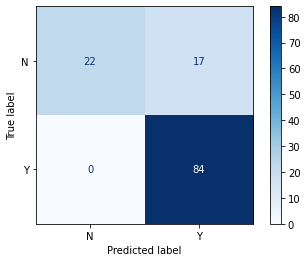

In [170]:
cm = confusion_matrix(y_test_xgb, XGBC_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="5.7"></a>
### 5.7 Logistic Regression Classifier

##### Accuracy

In [223]:
LR_accuracy_score = accuracy_score(expected_y, LRC_predicted_y)*100
scores_of_models.append(LR_accuracy_score)
print('The accuracy of LGC classification is %.2f%%' % LR_accuracy_score)

The accuracy of LGC classification is 86.18%


##### F1-Score

In [172]:
print('The F1 Score of LGC classification is %.3f' %(f1_score(expected_y, LRC_predicted_y, average='macro')))

The F1 Score of LGC classification is 0.815


##### Confusion Matrix

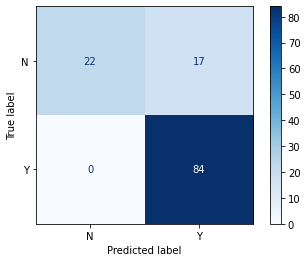

In [173]:
cm = confusion_matrix(expected_y, LRC_predicted_y)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['N', 'Y'])
disp.plot(cmap=plt.cm.Blues)

<a id="6"></a>
## 6 - Conclusion

Let's Compare all accuracy of all the previous Classification Models

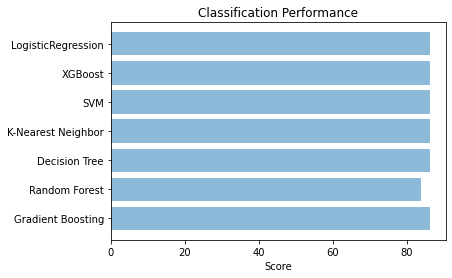

In [224]:
plt.barh(y_pos, scores_of_models, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

##### The result is *Logistic Regression and Support Vector Machine and KNN* have the highest score from other classification algorithm.